This code can produce Fig 2 and 3. Unfortunately, the random functions used in the paper may not be exactly reproduced because the seed used to genrate the true model may not reproduce the same functions on your device.

In [1]:
from sola.main_classes import functions
from sola.main_classes import domains
from sola.main_classes import spaces
from sola.aux.other import simple_property

import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

Create the domain for the functions

In [2]:
####################
# Create model space
####################
# Edit region -------------
physical_parameters = ['m_1', 'm_2', 'm_3']
# Edit region -------------

physical_parameters_symbols = {'m_1': '$m^1$', 'm_2': '$m^2$', 'm_3': '$m^3$'}
no_of_params = len(physical_parameters)
domain = domains.HyperParalelipiped(bounds=[[0, 1]], fineness=1000)
constituent_models_spaces = [spaces.PCb(domain=domain) for _ in physical_parameters]
# Create a dictionary with physical_parameters as keys
models_dict = {param: model_space for param, model_space in zip(physical_parameters, constituent_models_spaces)}
M = spaces.DirectSumSpace(tuple(constituent_models_spaces))

Now we create several property mappings. All of these properties act by default on m_1 (but you can change this). 

In [3]:
###################################
# Create property mappings and space
###################################
# Edit region -------------
how_many_targets = 1000
enquiry_points = np.linspace(domain.bounds[0][0],
                             domain.bounds[0][1],
                             how_many_targets)
widths = 0.1 * np.ones_like(enquiry_points) # same units as domain (km here)
# Edit region -------------

P = spaces.RN(dimension=how_many_targets)
# Averages
target_types = {'m_1': functions.Gaussian_1D,
                'm_2': functions.Null_1D,
                'm_3': functions.Null_1D}
T_1 = simple_property(M=M, P=P, target_types=target_types, domain=domain,
                      enquiry_points=enquiry_points, widths=widths, models_dict=models_dict)
# Boxcar
target_types = {'m_1': functions.Gaussian_Bump_1D,
                'm_2': functions.Null_1D,
                'm_3': functions.Null_1D}
T_2 = simple_property(M=M, P=P, target_types=target_types, domain=domain,
                      enquiry_points=enquiry_points, widths=widths, models_dict=models_dict)
# Bump
target_types = {'m_1': functions.Boxcar_1D,
                'm_2': functions.Null_1D,
                'm_3': functions.Null_1D}
T_3 = simple_property(M=M, P=P, target_types=target_types, domain=domain,
                      enquiry_points=enquiry_points, widths=widths, models_dict=models_dict)

# Derivatives
target_types = {'m_1': functions.Dgaussian_1D,
                'm_2': functions.Null_1D,
                'm_3': functions.Null_1D}
DT_1 = simple_property(M=M, P=P, target_types=target_types, domain=domain,
                      enquiry_points=enquiry_points, widths=widths, models_dict=models_dict)
# Boxcar
target_types = {'m_1': functions.Dgaussian_Bump_1D,
                'm_2': functions.Null_1D,
                'm_3': functions.Null_1D}
DT_2 = simple_property(M=M, P=P, target_types=target_types, domain=domain,
                      enquiry_points=enquiry_points, widths=widths, models_dict=models_dict)
# Bump
target_types = {'m_1': functions.Haar_1D,
                'm_2': functions.Null_1D,
                'm_3': functions.Null_1D}
DT_3 = simple_property(M=M, P=P, target_types=target_types, domain=domain,
                      enquiry_points=enquiry_points, widths=widths, models_dict=models_dict)

# The targets

Now let's visualize the targets. First we look at some averaging targets. For plotting purposes, the target kernels visualized here have a width of 0.6, while those that define the property mappings have a width defined in the previous code block.

In [4]:
gaussian = functions.Gaussian_1D(domain=domain, center=0.5, width=0.6)
bump = functions.Gaussian_Bump_1D(domain=domain, center=0.5, width=0.6, pointiness=2)
boxcar = functions.Boxcar_1D(domain=domain, center=0.5, width=0.6)

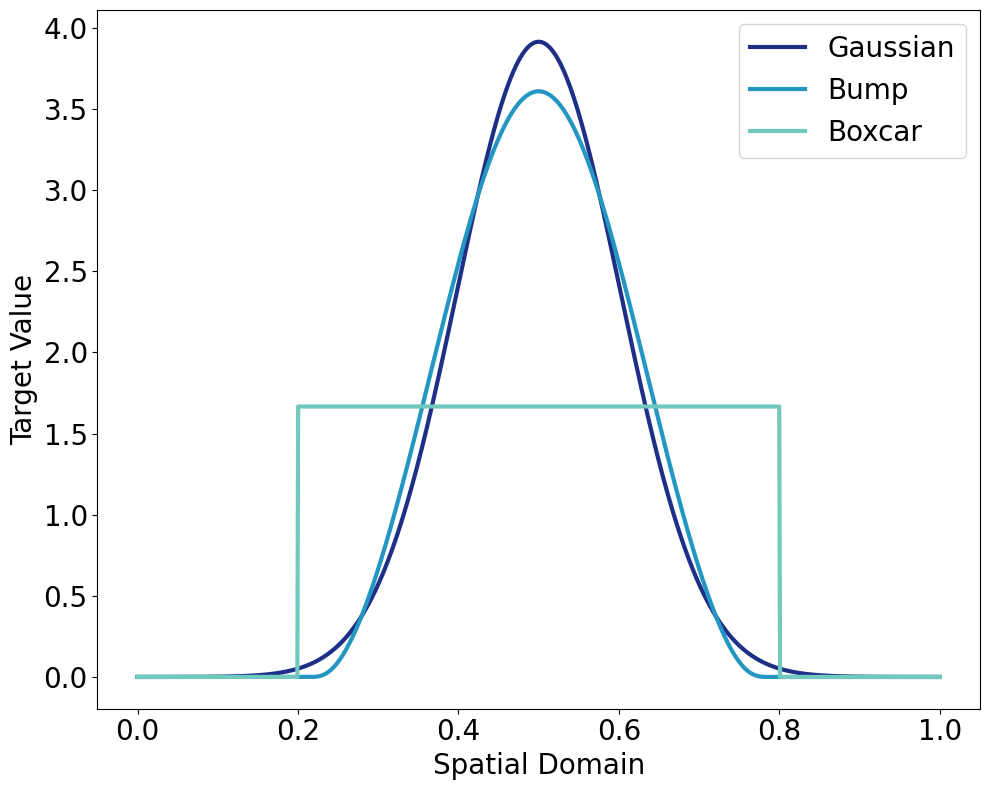

In [5]:
%matplotlib inline
palette = sns.color_palette('YlGnBu', n_colors=100)
plt.figure('local averages', figsize=(10,8))
plt.plot(domain.mesh, gaussian.evaluate(domain.mesh), color=palette[90], linewidth=3, label='Gaussian')
plt.plot(domain.mesh, bump.evaluate(domain.mesh), color=palette[60], linewidth=3, label='Bump')
plt.plot(domain.mesh, boxcar.evaluate(domain.mesh), color=palette[40], linewidth=3, label='Boxcar')

# Add labels and title
plt.xlabel('Spatial Domain', fontsize=20)
plt.ylabel('Target Value', fontsize=20)
#plt.title('Local Average Targets', fontsize=25, fontweight='bold')

# Customize tick marks and labels
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

# Add legend
plt.legend(fontsize=20)

# Fine-tune aesthetics
plt.tight_layout()

# Save the plot as an image for inclusion in the research paper
plt.savefig('Target_Kernels_images/Average_targets.png', dpi=300)  # Save the plot as a high-resolution image
plt.show()

And now we look at the gradient targets.

In [6]:
dgaussian = functions.Dgaussian_1D(domain=domain, center=0.5, width=0.6)
dbump = functions.Dgaussian_Bump_1D(domain=domain, center=0.5, width=0.6, pointiness=2)
haar = functions.Haar_1D(domain=domain, center=0.5, width=0.6)

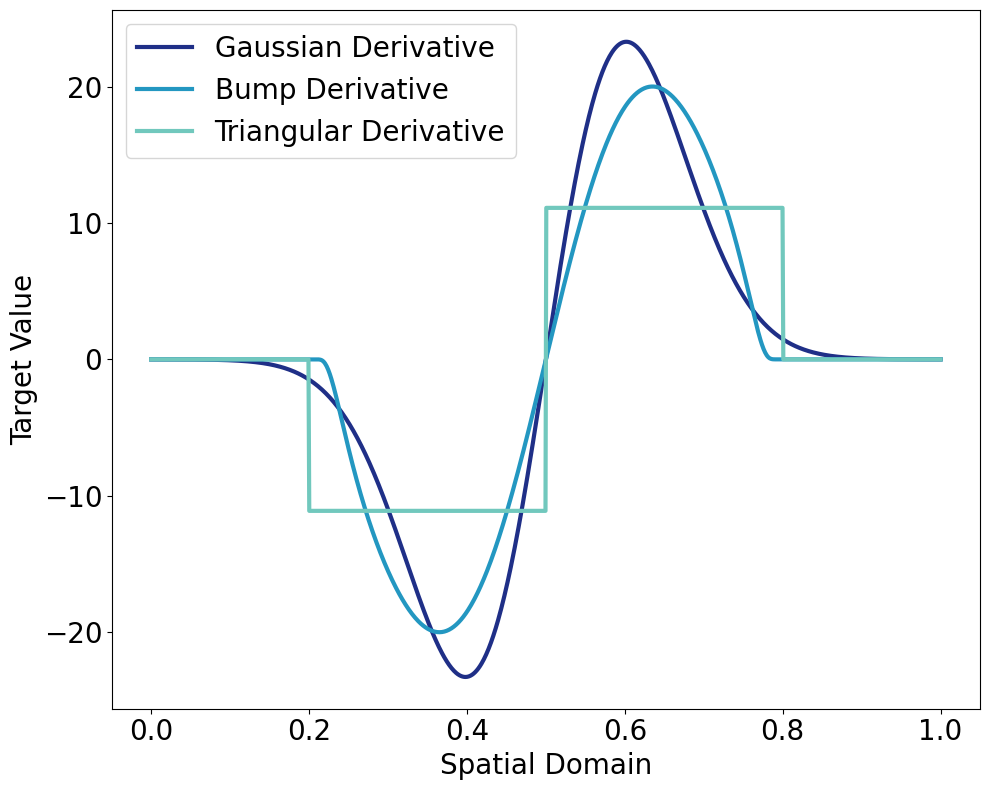

In [7]:
plt.figure('local averages', figsize=(10,8))
plt.plot(domain.mesh, dgaussian.evaluate(domain.mesh), color=palette[90], linewidth=3, label='Gaussian Derivative')
plt.plot(domain.mesh, dbump.evaluate(domain.mesh, check_if_in_domain=False), color=palette[60], linewidth=3, label='Bump Derivative')
plt.plot(domain.mesh, haar.evaluate(domain.mesh), color=palette[40], linewidth=3, label='Triangular Derivative')

# Add labels and title
plt.xlabel('Spatial Domain', fontsize=20)
plt.ylabel('Target Value', fontsize=20)
#plt.title('Local Gradient Targets', fontsize=25, fontweight='bold')

# Customize tick marks and labels
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

# Add legend
plt.legend(fontsize=20)

# Fine-tune aesthetics
plt.tight_layout()

# Save the plot as an image for inclusion in the research paper
plt.savefig('Target_Kernels_images/Derivative_Targets.png', dpi=300)  # Save the plot as a high-resolution image
plt.show()

Now we create a fake true model and we visualize it. 

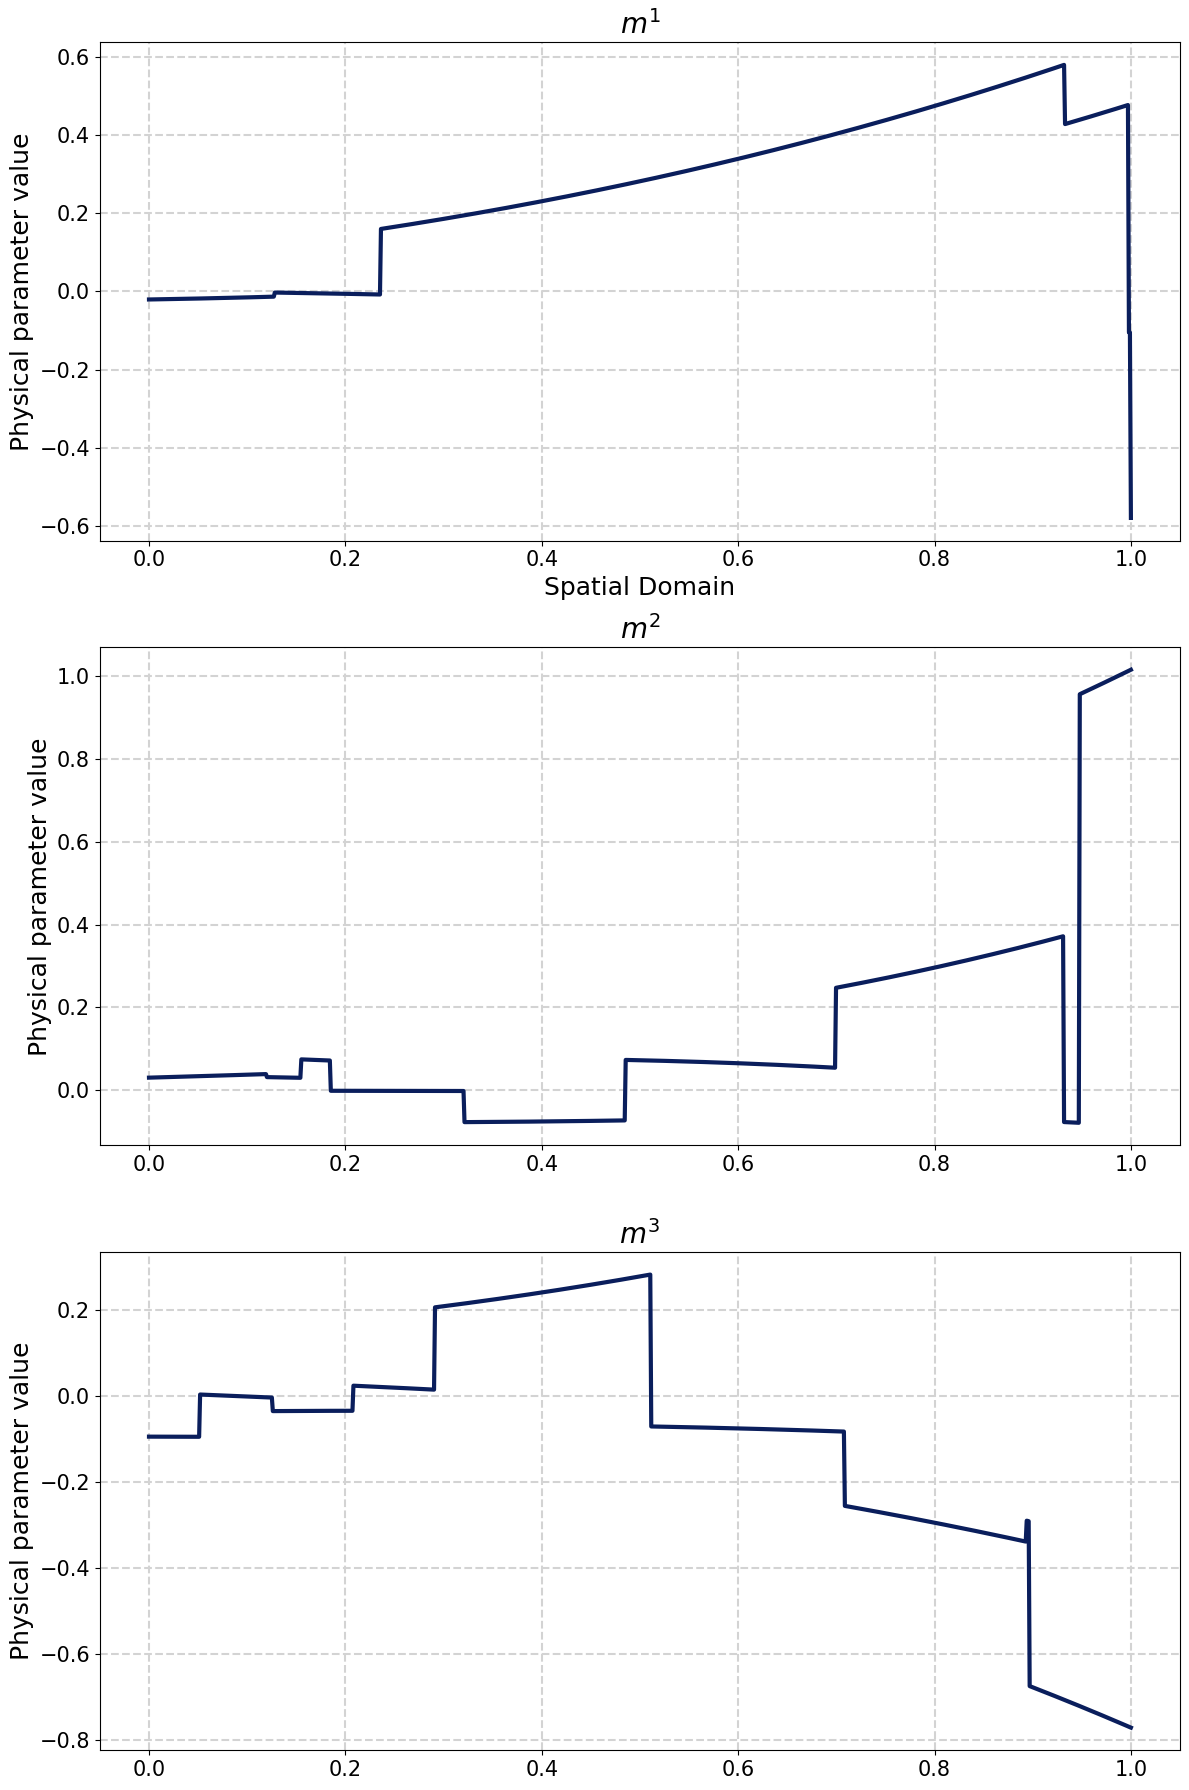

In [8]:
#################################
# Create fake true model and data
#################################
true_model = M.random_member(args_list=[(1,), (2,), (3,)])

# Plotting bit ----------------
fig, axes = plt.subplots(len(physical_parameters), 1, figsize=(12,6*len(physical_parameters)))
for i, (submodel, physical_parameter) in enumerate(zip(true_model, physical_parameters)):
    axes[i].plot(domain.mesh, submodel.evaluate(domain.mesh),
            label='True Model', color=palette[99], linewidth=3)
    axes[i].set_title(physical_parameters_symbols[physical_parameter], fontsize=20)
    axes[i].set_ylabel('Physical parameter value', fontsize=18)
    axes[i].tick_params(axis='both', which='major', labelsize=15)
    axes[i].grid(True, linestyle='--', linewidth=1.5, color='lightgray')  # Add gridlines
axes[0].set_xlabel('Spatial Domain', fontsize=18)
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.savefig('Target_Kernels_images/truth.png', dpi=300, bbox_inches='tight')  # Save figure
plt.show()

# Effect of these targets on a model

Here we map the true model through the averaging target kernels and plot the resulting vector against the enquiry point, which reveals that our property vector can be seen as a discrete smoothing operator. 

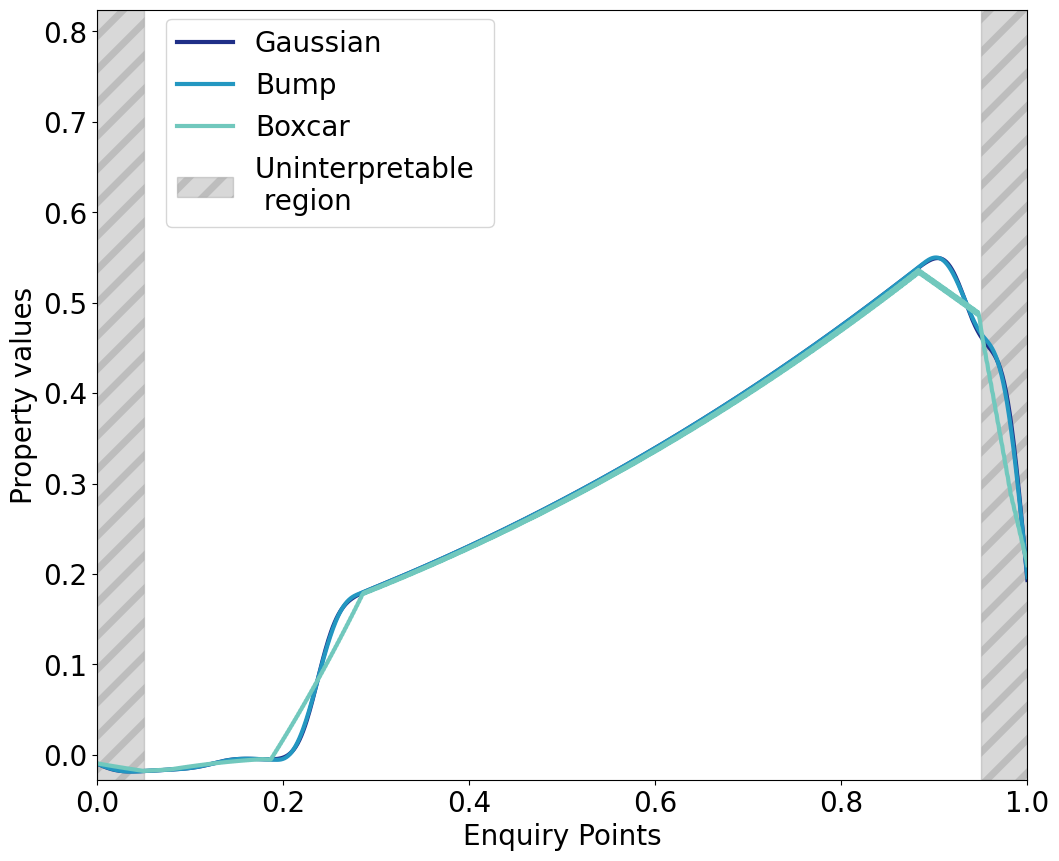

In [9]:
matplotlib.rcParams['hatch.linewidth'] = 5.0
y_min = np.min(T_1.map(true_model))*1.5
y_max = np.max(T_1.map(true_model))*1.5
plt.figure('properties', figsize=(12,10))
plt.plot(enquiry_points, T_1.map(true_model),
        color=palette[90], linewidth=3, label='Gaussian')
plt.plot(enquiry_points, T_2.map(true_model),
        color=palette[60], linewidth=3, label='Bump')
plt.plot(enquiry_points, T_3.map(true_model),
        color=palette[40], linewidth=3, label='Boxcar')
plt.fill_betweenx([y_min, y_max], 0, widths[0]/2, color='gray',
                  hatch='/', alpha=0.3, label='Uninterpretable \n region')
plt.fill_betweenx([y_min, y_max], domain.bounds[0][1] - widths[0]/2,
                  domain.bounds[0][1], color='gray', hatch='/', alpha=0.3)
plt.legend(fontsize=20, loc='lower center', bbox_to_anchor=(0.25, 0.7))
plt.xticks(size=20)
plt.yticks(size=20)
plt.ylim([y_min, y_max])
plt.xlim([0,1])
#plt.title('True Property', fontsize=25)
plt.xlabel('Enquiry Points', fontsize=20)
plt.ylabel('Property values', fontsize=20)
plt.savefig('Target_Kernels_images/Local_Avg_Properties.png', dpi=300, bbox_inches='tight')
plt.show()


Similarly, we apply the property mappings corresponding to the gradient targets ...

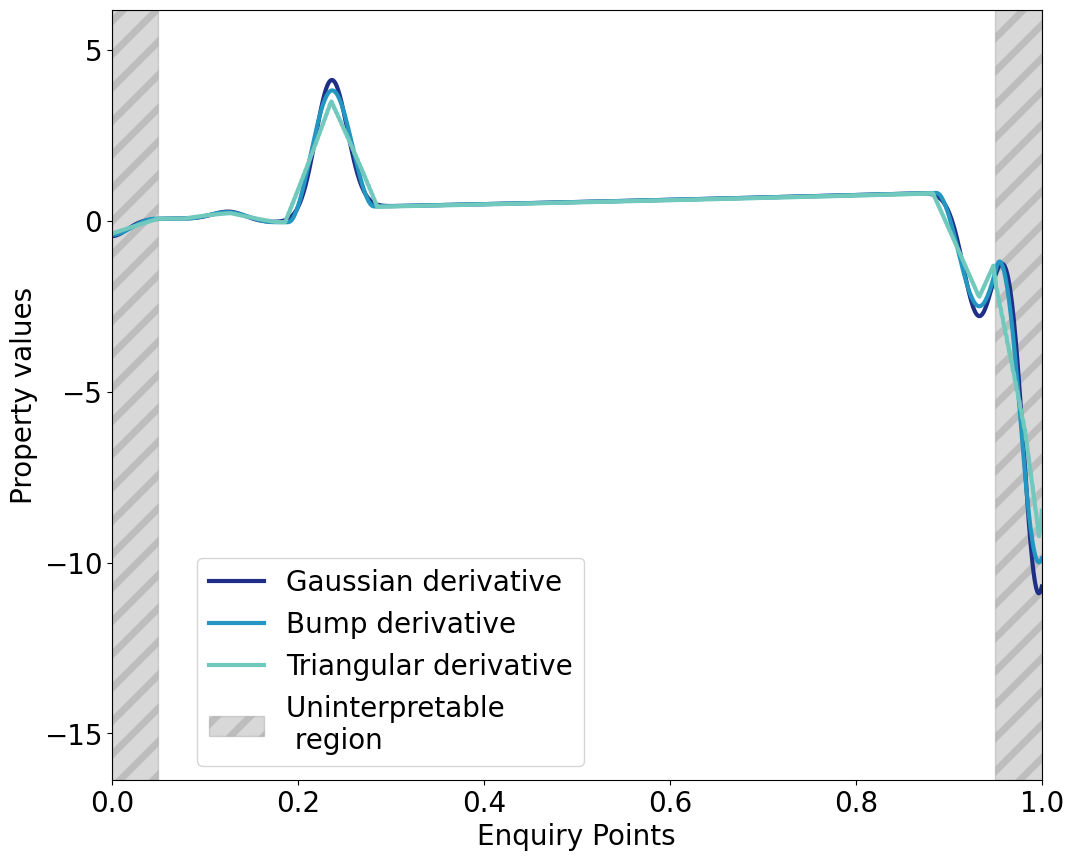

In [10]:
y_min = np.min(DT_1.map(true_model))*1.5
y_max = np.max(DT_1.map(true_model))*1.5
plt.figure('properties', figsize=(12,10))
plt.plot(enquiry_points, DT_1.map(true_model),
        color=palette[90], linewidth=3, label='Gaussian derivative')
plt.plot(enquiry_points, DT_2.map(true_model),
        color=palette[60], linewidth=3, label='Bump derivative')
plt.plot(enquiry_points, DT_3.map(true_model),
        color=palette[40], linewidth=3, label='Triangular derivative')
plt.fill_betweenx([y_min, y_max], 0, widths[0]/2, color='gray',
                  hatch='/', alpha=0.3, label='Uninterpretable \n region')
plt.fill_betweenx([y_min, y_max], domain.bounds[0][1] - widths[0]/2,
                  domain.bounds[0][1], color='gray', hatch='/', alpha=0.3)
plt.legend(fontsize=20, loc='lower center', bbox_to_anchor=(0.3, 0))
plt.xticks(size=20)
plt.yticks(size=20)
plt.ylim([y_min, y_max])
plt.xlim([0,1])
#plt.title('True Property', fontsize=25)
plt.xlabel('Enquiry Points', fontsize=20)
plt.ylabel('Property values', fontsize=20)
plt.savefig('Target_Kernels_images/Local_Deriv_Properties.png', dpi=300, bbox_inches='tight')
plt.show()